In [216]:
#pip install graphviz

In [34]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import ggplot, aes, geom_count ,geom_violin ,geom_tile,scale_fill_gradient2

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from datetime import datetime

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score,train_test_split, StratifiedKFold, learning_curve, KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedShuffleSplit,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

#Choose the model you want to use (replace 'ModelName' with the actual name)
from sklearn.tree import DecisionTreeRegressor  # Decision Tree
from sklearn.ensemble import RandomForestRegressor  # Random Forest
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting
from xgboost import XGBRegressor,plot_importance,plot_tree,to_graphviz  # XGBoost
#import xgboost
#from lightgbm import LGBMRegressor  # LightGBM
#import lightgbm as lgb

from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

from sklearn import tree
#from dtreeviz.trees import dtreeviz


# Import data

In [2]:
sample_sub = pd.read_csv('sample_submission.csv')
aba_train_data = pd.read_csv('train.csv')
aba_test_data = pd.read_csv('test.csv')

In [3]:
aba_train_data.head(10)

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   
5   5   F   0.610     0.480   0.170        1.2010          0.5335   
6   6   M   0.415     0.325   0.110        0.3315          0.1655   
7   7   F   0.610     0.490   0.150        1.1165          0.4955   
8   8   I   0.205     0.150   0.040        0.0460          0.0145   
9   9   I   0.565     0.425   0.125        0.6510          0.3795   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  
5          0.3135        0.3085     10  
6          0.0715        0.1300      9  
7          0.2945        0.2950      9  
8          0.0105        0.0100      4  
9          0.1420        0.1800      8

In [4]:
aba_test_data.tail(10)

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
60401  151016   F   0.585     0.455   0.155        0.9125          0.3125   
60402  151017   I   0.400     0.315   0.095        0.2645          0.1150   
60403  151018   F   0.605     0.475   0.145        0.9740          0.4305   
60404  151019   I   0.560     0.430   0.130        0.7650          0.3065   
60405  151020   M   0.570     0.435   0.125        0.9265          0.3685   
60406  151021   I   0.345     0.260   0.085        0.1775          0.0735   
60407  151022   F   0.525     0.410   0.145        0.8445          0.3885   
60408  151023   I   0.590     0.440   0.155        1.1220          0.3930   
60409  151024   F   0.660     0.525   0.190        1.4935          0.5885   
60410  151025   F   0.430     0.340   0.120        0.4150          0.1525   

       Whole weight.2  Shell weight  
60401          0.1935        0.3200  
60402          0.0530        0.0740  
60403          0.2300        0.3150  
60404          0.1740        0.2565  
60405          0.2015        0.2950  
60406          0.0265        0.0500  
60407          0.1670        0.2050  
60408          0.2000        0.2650  
60409          0.3575        0.4350  
60410          0.0910        0.0905

In [5]:
aba_test_data.shape

(60411, 9)

# Basic explore data


In [6]:
aba_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [7]:
num_col_ls = ['Length',
'Diameter',
'Height',
'Whole weight',
'Whole weight.1',
'Whole weight.2',
'Shell weight',
'Rings']

In [8]:
aba_train_data.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
aba_train_data.describe()

id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.001000        0.000500      0.001500      1.000000  
25%          0.177500        0.086500      0.120000      8.000000  
50%          0.330000        0.166000      0.225000      9.000000  
75%          0.463000        0.232500      0.305000     11.000000  
max          1.488000        0.760000      1.005000     29.000000

# EDA

In [10]:
aba_train_data_eda = aba_train_data.drop("id",axis=1)

In [11]:
aba_train_data_eda.shape

(90615, 9)

In [12]:
aba_train_data_eda.head()

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   F   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   F   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   I   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   M   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   I   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  
0        0.2400     11  
1        0.3200     11  
2        0.0050      6  
3        0.2500     10  
4        0.1975      9

/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldco

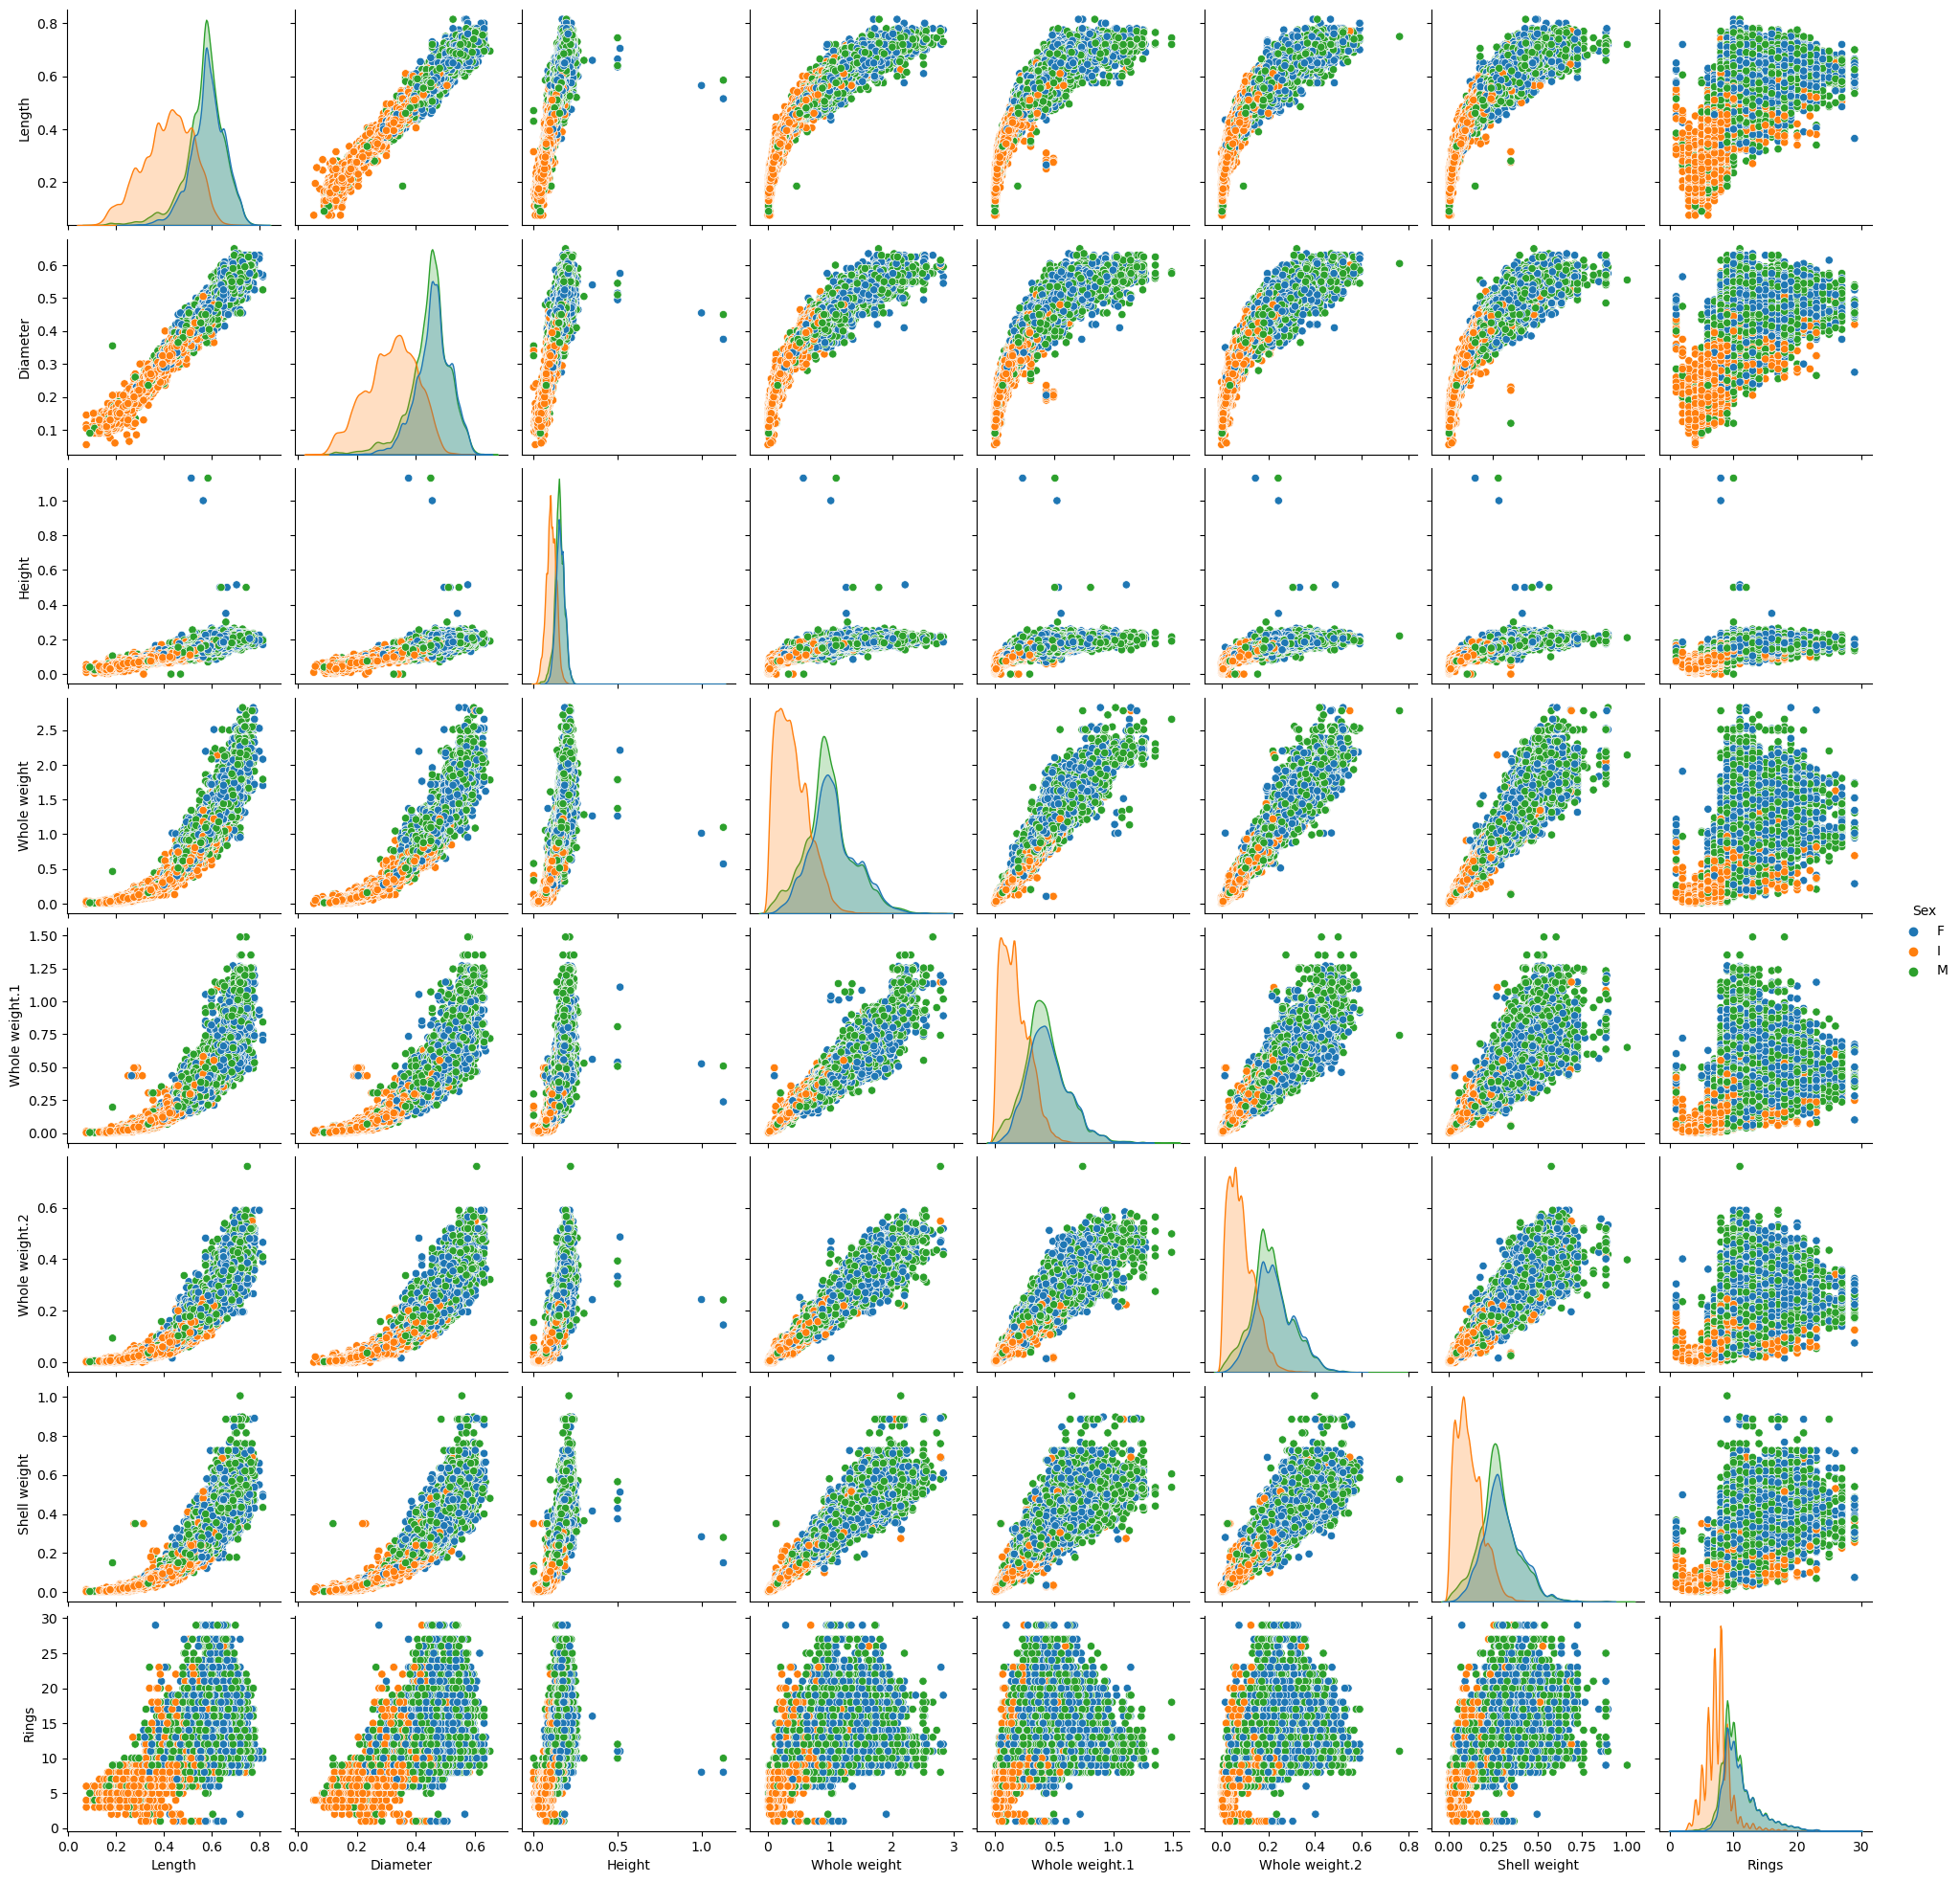

In [11]:
sns.pairplot(aba_train_data_eda, hue="Sex")

<Axes: >

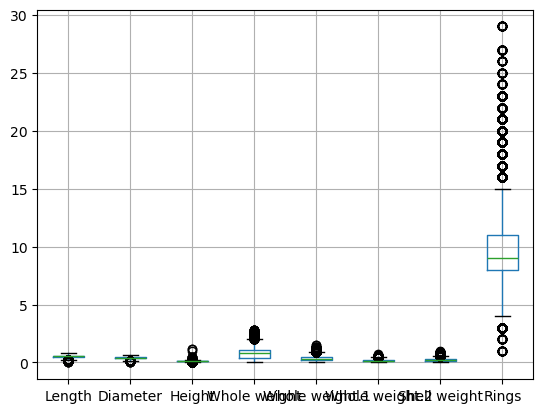

In [13]:
aba_train_data_eda.boxplot()

In [14]:
(aba_train_data_eda[num_col_ls]/aba_train_data_eda[num_col_ls].mean()).boxplot()

<Axes: >

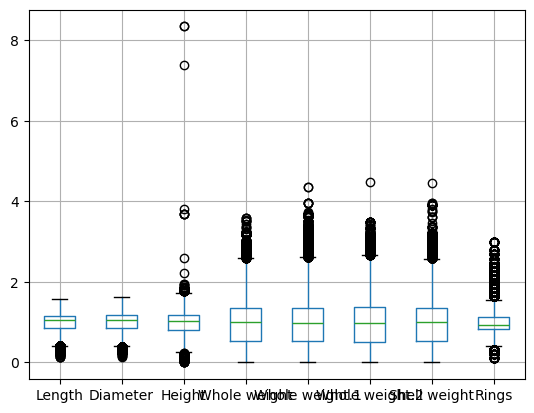

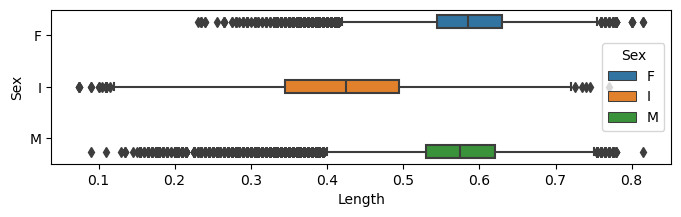

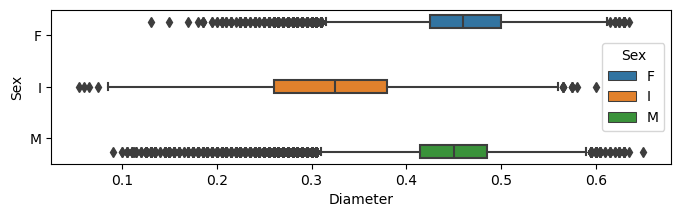

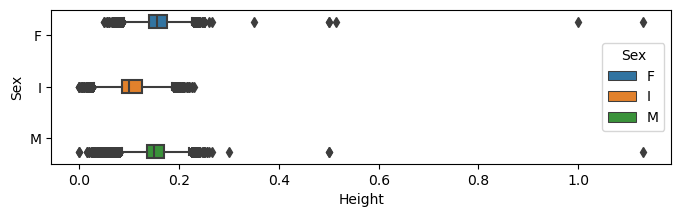

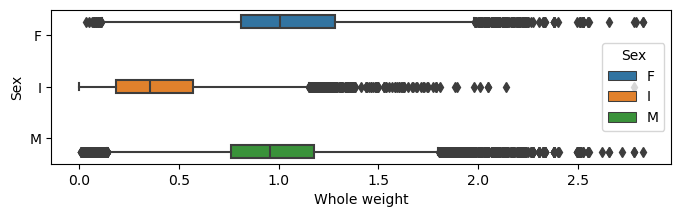

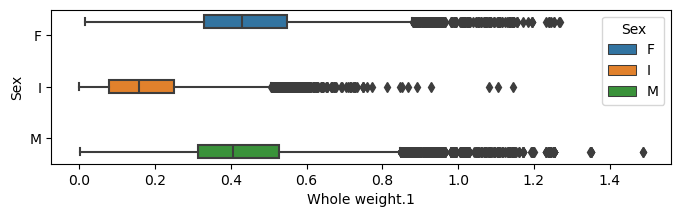

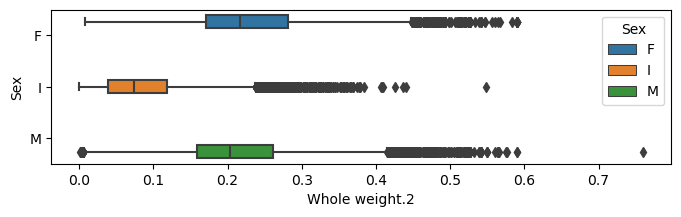

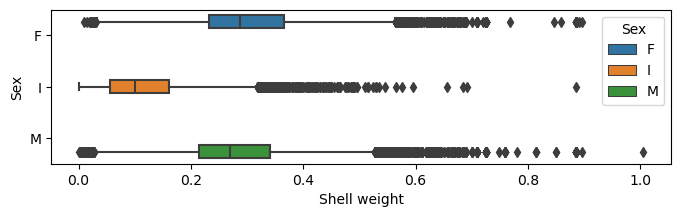

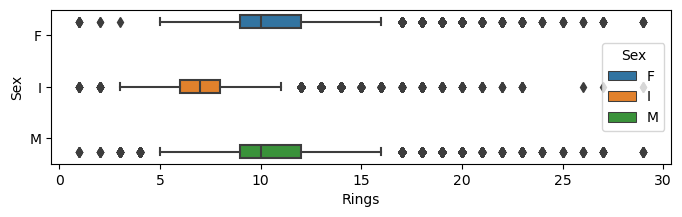

In [15]:
for i in num_col_ls:
    plt.figure(figsize=(8,2))
    sns.boxplot(data=aba_train_data_eda, y="Sex", x=i , hue="Sex")
    plt.show()

# Prepare data before train model

In [16]:
aba_train_data_prep = aba_train_data_eda[:]

In [17]:
aba_train_data_prep.head()

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   F   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   F   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   I   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   M   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   I   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  
0        0.2400     11  
1        0.3200     11  
2        0.0050      6  
3        0.2500     10  
4        0.1975      9

In [18]:
# Outlier

# calculate IQR for column Height
Q1 = aba_train_data_prep['Rings'].quantile(0.25)
Q3 = aba_train_data_prep['Rings'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = aba_train_data_prep[(aba_train_data_prep['Rings'] < Q1 - threshold * IQR) |
                               (aba_train_data_prep['Rings'] > Q3 + threshold * IQR)]

print("Q1 : " + str(Q1))
print("Q3 : " + str(Q3))

Q1 : 8.0
Q3 : 11.0


In [19]:
outliers.head()

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
27    M   0.645     0.525   0.175        1.4890          0.5985   
29    M   0.580     0.450   0.165        1.0425          0.3745   
37    F   0.605     0.475   0.175        1.2415          0.5305   
79    F   0.585     0.530   0.160        1.0540          0.3895   
107   I   0.205     0.185   0.055        0.0235          0.0075   

     Whole weight.2  Shell weight  Rings  
27           0.3315         0.400     20  
29           0.2075         0.455     20  
37           0.3065         0.340     17  
79           0.1905         0.375     23  
107          0.0050         0.010      3

In [20]:
for col in num_col_ls:
    Q1 = aba_train_data_prep[col].quantile(0.25)
    Q3 = aba_train_data_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    
    threshold = 1.5
    outliers = aba_train_data_prep[(aba_train_data_prep[col] < Q1 - threshold * IQR) | 
                                   (aba_train_data_prep[col] > Q3 + threshold * IQR)]
    
    print(col)
    print("Q1 : " + str(Q1))
    print("Q3 : " + str(Q3))
    print("----------------------")
    
    aba_train_data_prep = aba_train_data_prep.drop(outliers.index)

Length
Q1 : 0.445
Q3 : 0.6
----------------------
Diameter
Q1 : 0.35
Q3 : 0.47
----------------------
Height
Q1 : 0.11
Q3 : 0.16
----------------------
Whole weight
Q1 : 0.4405
Q3 : 1.073
----------------------
Whole weight.1
Q1 : 0.1865
Q3 : 0.4625
----------------------
Whole weight.2
Q1 : 0.0905
Q3 : 0.231
----------------------
Shell weight
Q1 : 0.126
Q3 : 0.3005
----------------------
Rings
Q1 : 8.0
Q3 : 11.0
----------------------


In [21]:
aba_train_data_prep.shape

(81838, 9)

In [28]:
(aba_train_data_prep[num_col_ls]/aba_train_data_prep[num_col_ls].mean()).head()

Length  Diameter    Height  Whole weight  Whole weight.1  Whole weight.2  \
0  1.065856  1.073945  1.118988      1.014784        0.990864        0.893543   
1  1.220889  1.223797  1.081689      1.486334        1.381478        1.686447   
3  1.153062  1.186334  1.118988      1.202878        1.132631        1.253399   
4  1.075545  1.061457  0.969790      1.028596        1.114533        0.975883   
5  1.182131  1.198822  1.268187      1.579723        1.609211        1.912120   

   Shell weight     Rings  
0      1.113891  1.188427  
1      1.485188  1.188427  
3      1.160303  1.080388  
4      0.916639  0.972349  
5      1.431814  1.080388

In [29]:
(aba_train_data_prep[num_col_ls]/aba_train_data_prep[num_col_ls].mean()).boxplot()

<Axes: >

/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldco

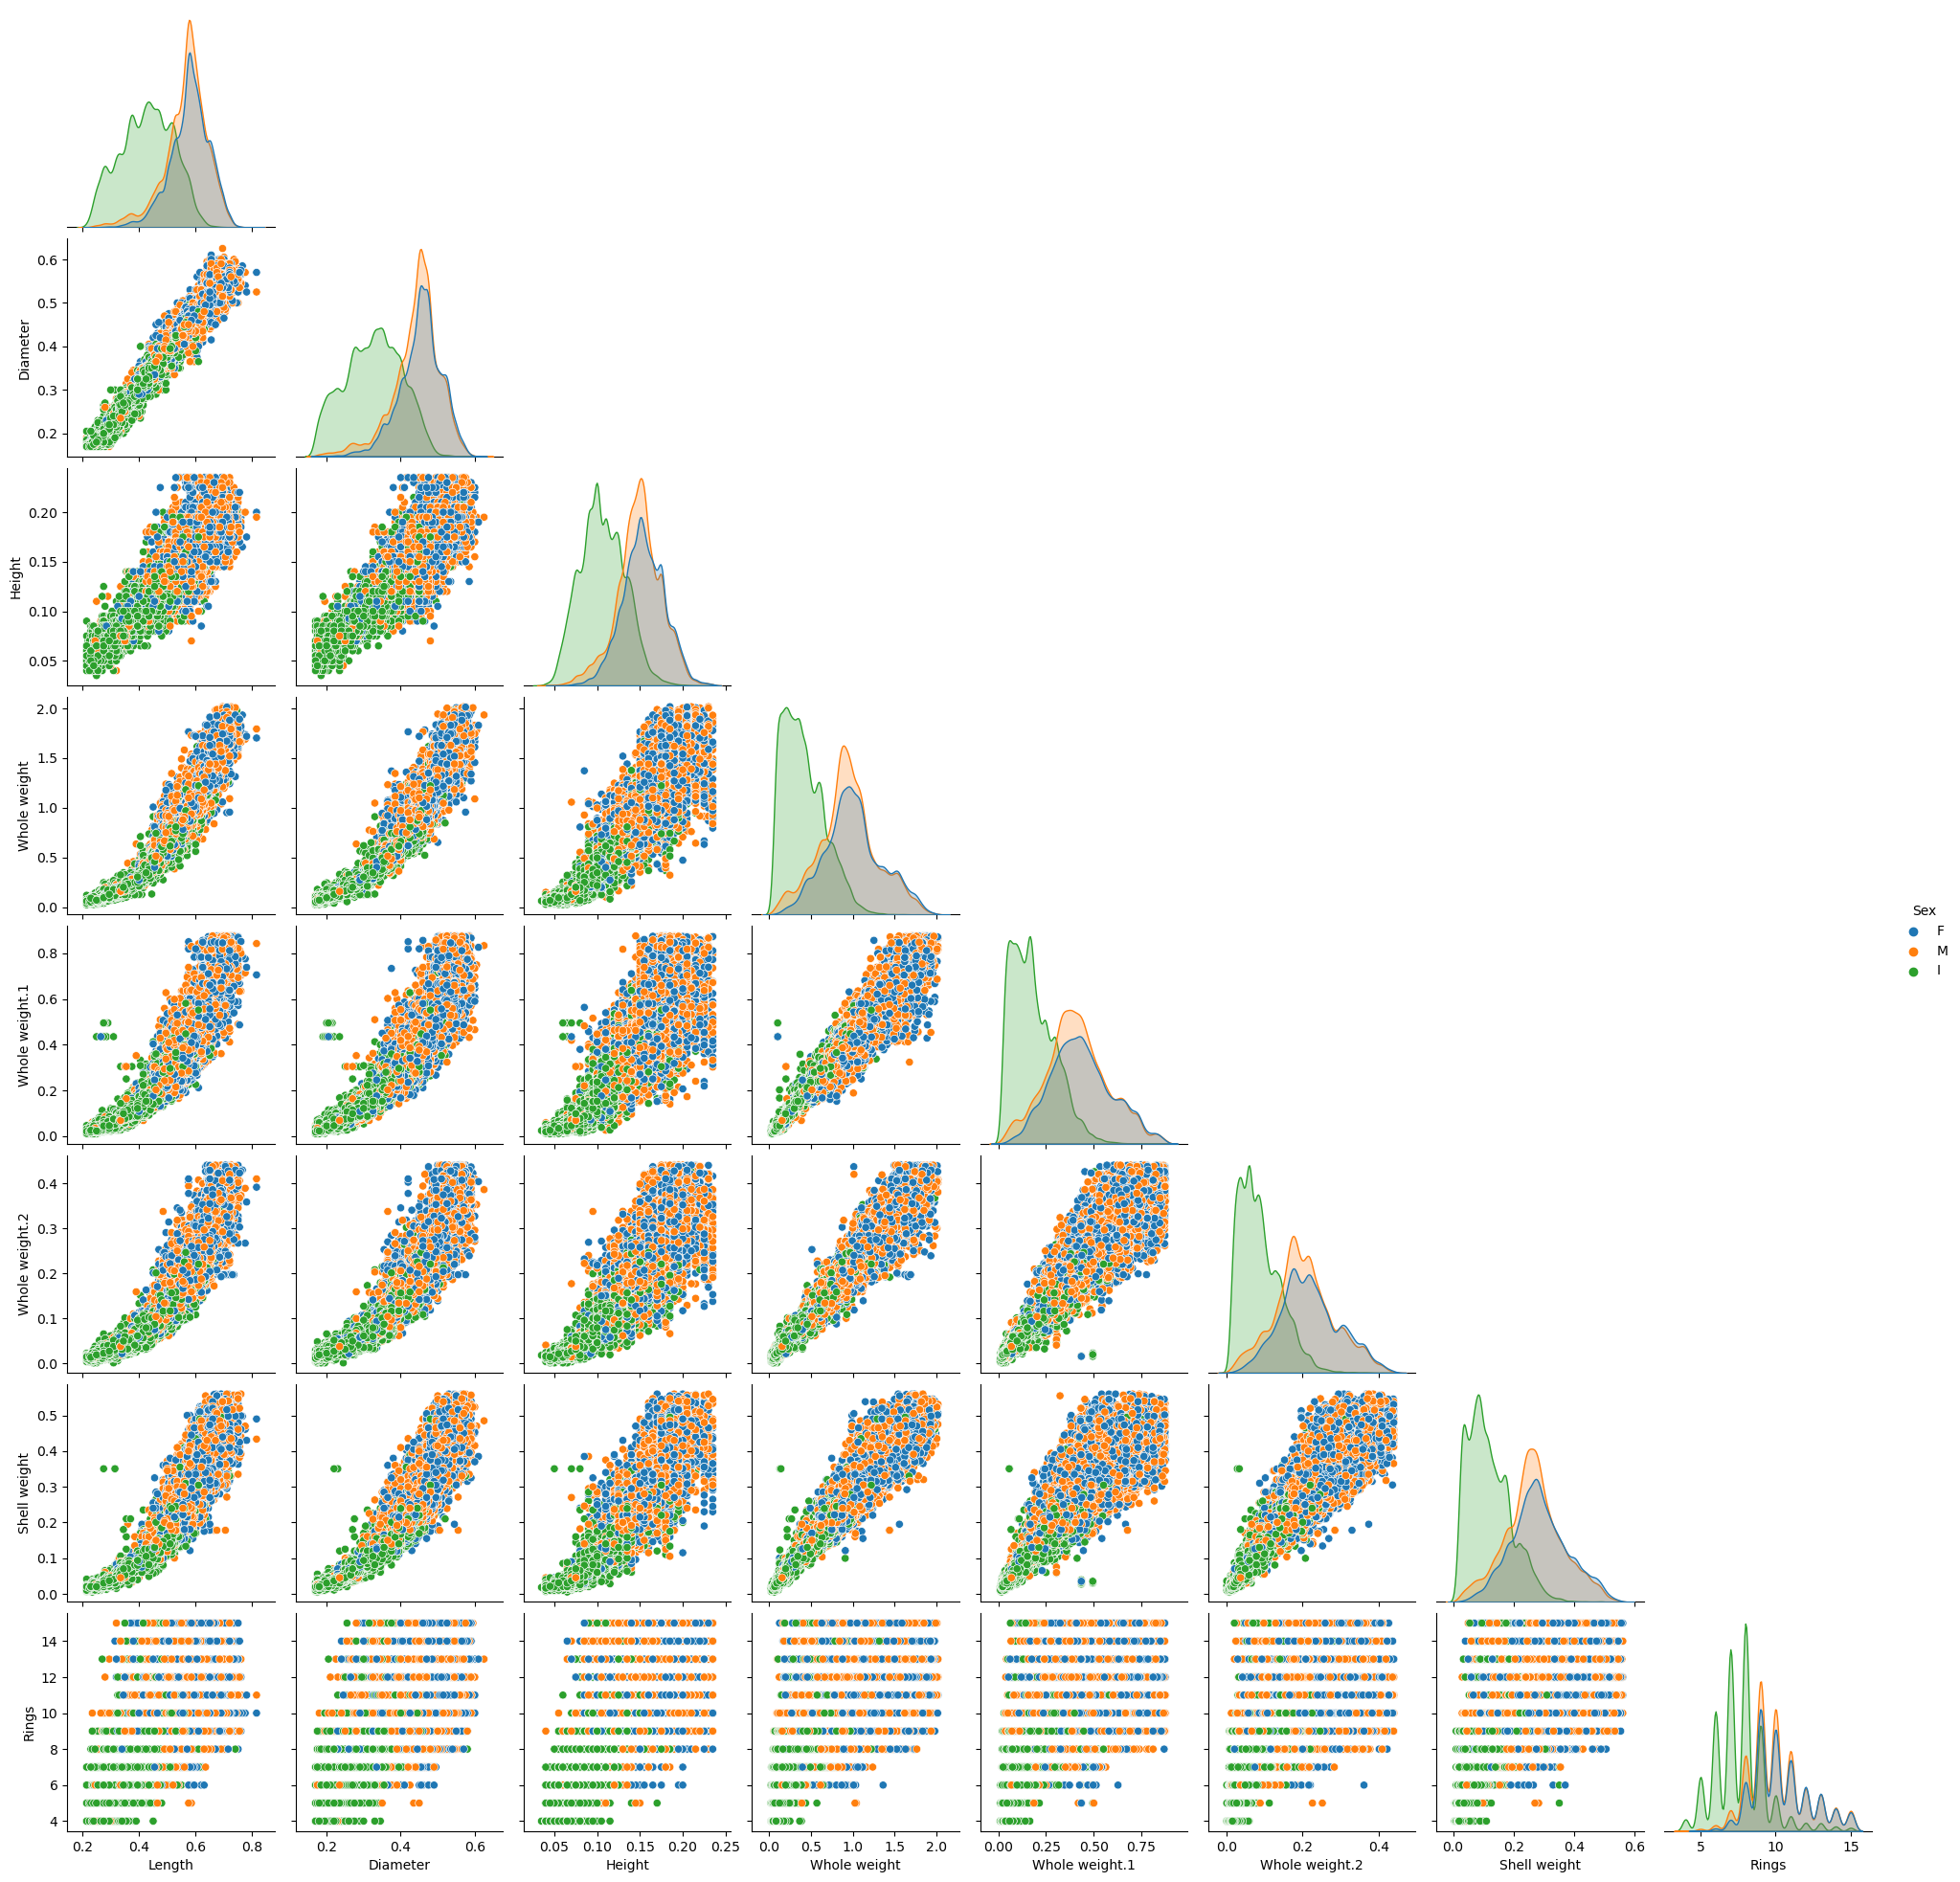

In [46]:
sns.pairplot(aba_train_data_prep, hue="Sex", corner=True)

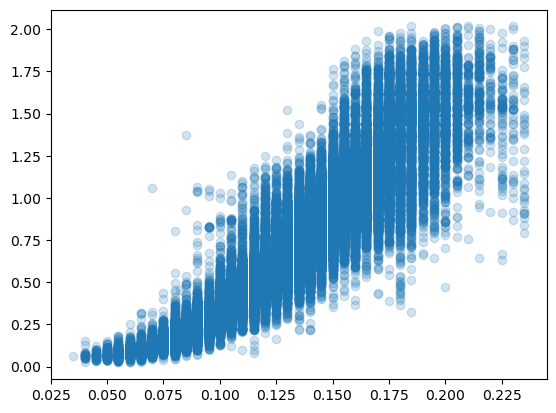

In [53]:
plt.scatter(aba_train_data_prep["Height"], aba_train_data_prep["Whole weight"], alpha=0.2)
plt.show()

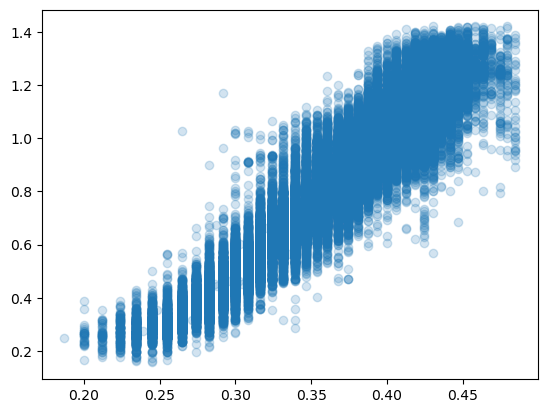

In [52]:
plt.scatter(np.sqrt(aba_train_data_prep["Height"]), np.sqrt(aba_train_data_prep["Whole weight"]), alpha=0.2)
plt.show()

In [54]:
aba_train_data_prep["Height"].corr(aba_train_data_prep["Whole weight"])

0.9181522057200461

In [55]:
np.sqrt(aba_train_data_prep["Height"]).corr(np.sqrt(aba_train_data_prep["Whole weight"]))

0.9399250868852101

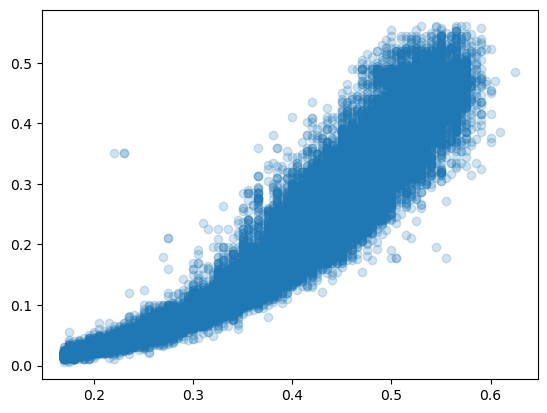

In [56]:
plt.scatter(aba_train_data_prep["Diameter"], aba_train_data_prep["Shell weight"], alpha=0.2)
plt.show()

In [58]:
aba_train_data_prep["Diameter"].corr(aba_train_data_prep["Shell weight"])

0.938145228966754

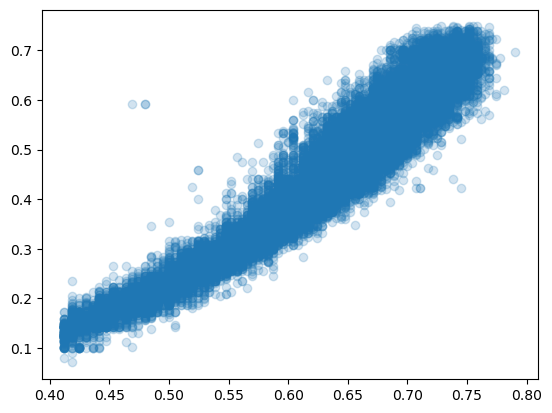

In [57]:
plt.scatter(np.sqrt(aba_train_data_prep["Diameter"]), np.sqrt(aba_train_data_prep["Shell weight"]), alpha=0.2)
plt.show()

In [59]:
np.sqrt(aba_train_data_prep["Diameter"]).corr(np.sqrt(aba_train_data_prep["Shell weight"]))

0.9648882933725333

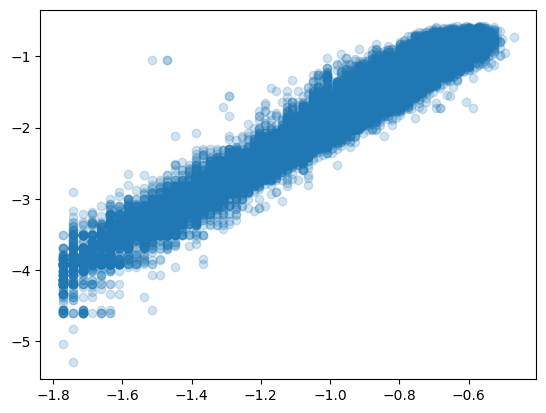

In [61]:
plt.scatter(np.log(aba_train_data_prep["Diameter"]), np.log(aba_train_data_prep["Shell weight"]), alpha=0.2)
plt.show()

In [60]:
np.log(aba_train_data_prep["Diameter"]).corr(np.log(aba_train_data_prep["Shell weight"]))

0.9796581642704574

In [62]:
aba_train_data_prep.tail()

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
90610   M   0.335     0.235   0.075        0.1585          0.0685   
90611   M   0.555     0.425   0.150        0.8790          0.3865   
90612   I   0.435     0.330   0.095        0.3215          0.1510   
90613   I   0.345     0.270   0.075        0.2000          0.0980   
90614   I   0.425     0.325   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  Rings  
90610          0.0370        0.0450      6  
90611          0.1815        0.2400      9  
90612          0.0785        0.0815      6  
90613          0.0490        0.0700      6  
90614          0.0785        0.1050      8

In [38]:
dummy_sex = pd.get_dummies(aba_train_data_prep['Sex'],drop_first=True)
aba_train_data_prep = pd.concat([aba_train_data_prep,dummy_sex], axis=1)

In [39]:
aba_train_data_prep = aba_train_data_prep.drop(['Sex'], axis=1)

In [40]:
aba_train_data_prep.head()

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   0.555     0.425   0.130        0.7820          0.3695          0.1600   
5   0.610     0.480   0.170        1.2010          0.5335          0.3135   

   Shell weight  Rings      I      M  
0        0.2400     11  False  False  
1        0.3200     11  False  False  
3        0.2500     10  False   True  
4        0.1975      9   True  False  
5        0.3085     10  False  False

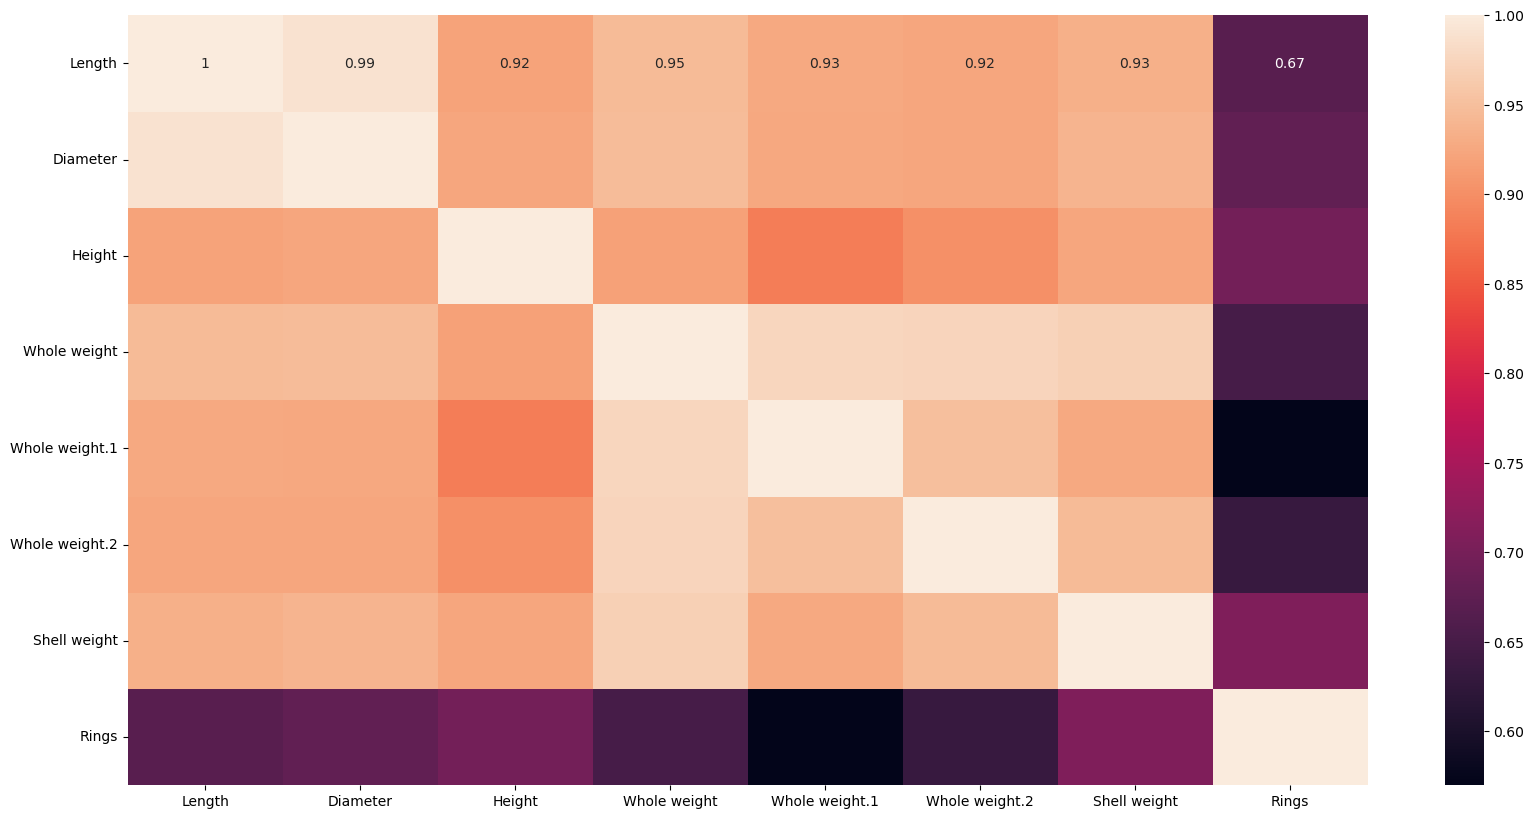

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(aba_train_data_prep[num_col_ls].corr(), annot=True)
plt.show()

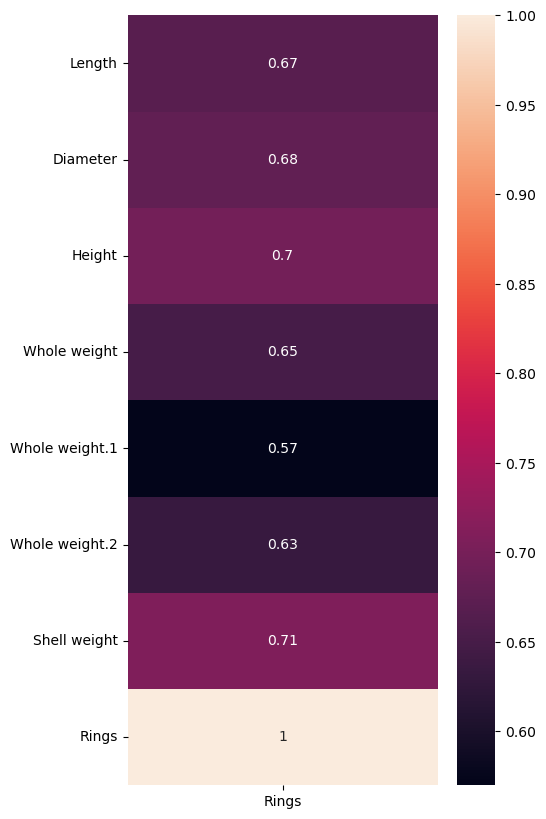

In [70]:
plt.figure(figsize=(5,10))
sns.heatmap(aba_train_data_prep[num_col_ls].corr()[['Rings']], annot=True)
plt.show()

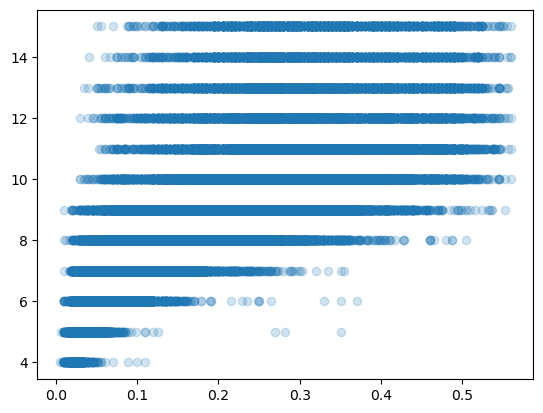

In [83]:
plt.scatter(aba_train_data_prep["Shell weight"], aba_train_data_prep["Rings"], alpha=0.2)
plt.show()

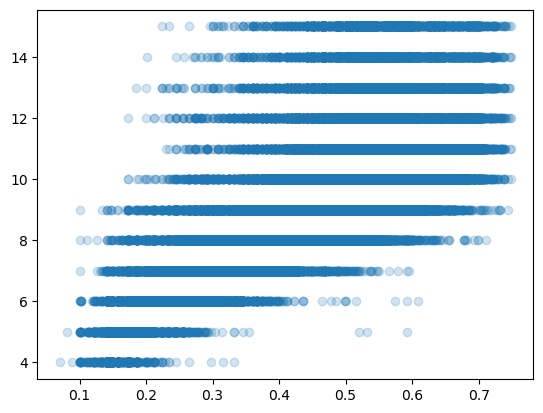

In [86]:
plt.scatter(np.sqrt(aba_train_data_prep["Shell weight"]), aba_train_data_prep["Rings"], alpha=0.2)
plt.show()

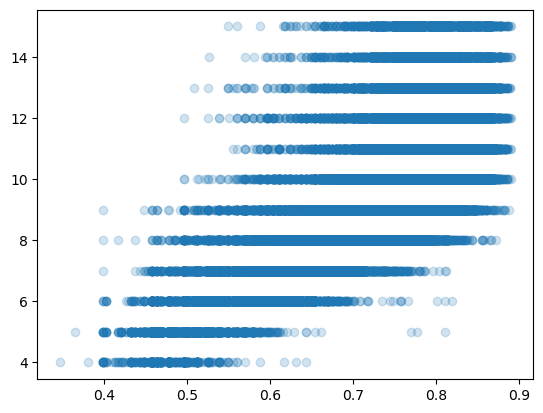

In [97]:
plt.scatter(aba_train_data_prep["Shell weight"]**(1/5), aba_train_data_prep["Rings"], alpha=0.2)
plt.show()

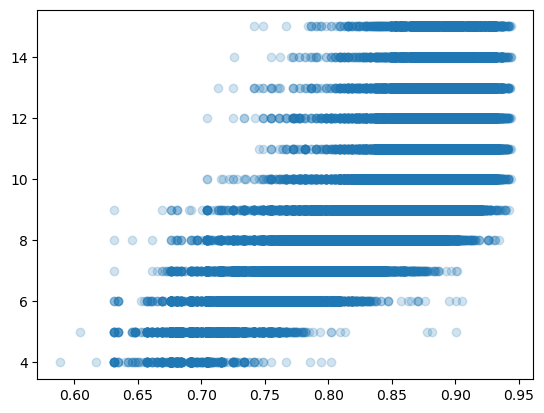

In [100]:
plt.scatter(aba_train_data_prep["Shell weight"]**(1/10), aba_train_data_prep["Rings"], alpha=0.2)
plt.show()

In [101]:
for i in range(1,10):
    print("1/" + str(i))
    print(aba_train_data_prep["Rings"].corr(aba_train_data_prep["Shell weight"]**(1/i)))
    print('---------')

1/1
0.708256897065507
---------
1/2
0.7300738838926277
---------
1/3
0.7320924384784241
---------
1/4
0.7318260555893314
---------
1/5
0.7312210705279334
---------
1/6
0.7306241226787147
---------
1/7
0.7301004426948927
---------
1/8
0.7296535733610765
---------
1/9
0.7292735583828959
---------


# Sample split

In [41]:
X = aba_train_data_prep.drop(['Rings'], axis=1)
y = aba_train_data_prep['Rings']

In [42]:
X.tail()

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
90610   0.335     0.235   0.075        0.1585          0.0685          0.0370   
90611   0.555     0.425   0.150        0.8790          0.3865          0.1815   
90612   0.435     0.330   0.095        0.3215          0.1510          0.0785   
90613   0.345     0.270   0.075        0.2000          0.0980          0.0490   
90614   0.425     0.325   0.100        0.3455          0.1525          0.0785   

       Shell weight      I      M  
90610        0.0450  False   True  
90611        0.2400  False   True  
90612        0.0815   True  False  
90613        0.0700   True  False  
90614        0.1050   True  False

In [43]:
X_train, X_val,y_train,y_val = train_test_split(X,y,test_size =0.2,random_state=42)

In [44]:
X_train.head()

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
40928   0.500      0.39    0.14        0.6245          0.2700          0.1455   
5432    0.380      0.30    0.10        0.2520          0.1065          0.0530   
67484   0.575      0.45    0.14        0.9640          0.4385          0.2145   
74901   0.260      0.20    0.07        0.0920          0.0415          0.0185   
78382   0.550      0.44    0.15        0.9210          0.4000          0.1825   

       Shell weight      I      M  
40928         0.170  False  False  
5432          0.085   True  False  
67484         0.230  False  False  
74901         0.030   True  False  
78382         0.240  False   True

In [45]:
y_train.head()

40928    11
5432      8
67484     9
74901     5
78382     8
Name: Rings, dtype: int64

# Train model

In [118]:
model_ls = [DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
            ,SVR(),AdaBoostRegressor(),ExtraTreesRegressor(),XGBRegressor()]

In [119]:
m_ls=['decision tree','random forest','gradient boosting','svr','adaboost','extratree','xgboost']
mse_ls=[]
mape_ls=[]
r2_ls=[]


for m in model_ls:
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    mse_ls.append(mse)
    mape_ls.append(mape)
    r2_ls.append(r2)

In [120]:
eval_df = pd.DataFrame(
    {'model': m_ls,
     'mse': mse_ls,
     'mape': mape_ls,
     'r2': r2_ls
    })

In [121]:
eval_df

model       mse      mape        r2
0      decision tree  3.722202  0.149544  0.277609
1      random forest  1.883369  0.111173  0.634483
2  gradient boosting  1.868878  0.109299  0.637295
3                svr  1.940751  0.106130  0.623346
4           adaboost  3.090864  0.172483  0.400136
5          extratree  1.906856  0.111840  0.629924
6            xgboost  1.825893  0.107947  0.645637

## ----------------------------------------------------------

In [122]:
# use only Shell weight and sex

In [133]:
X2 = X[:]

In [134]:
X2['Shell weight sqrt'] = X2["Shell weight"]**(1/2)

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_1945/1822665599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [135]:
feat_cl = ["Shell weight sqrt","I","M"]

In [136]:
X2 = X2[feat_cl]

In [137]:
X2.tail()

Shell weight sqrt      I      M
90610           0.212132  False   True
90611           0.489898  False   True
90612           0.285482   True  False
90613           0.264575   True  False
90614           0.324037   True  False

In [138]:
X_train, X_val,y_train,y_val = train_test_split(X2,y,test_size =0.2,random_state=42)

In [139]:
model_ls = [DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
            ,SVR(),AdaBoostRegressor(),ExtraTreesRegressor(),XGBRegressor()]

In [140]:
m_ls=['decision tree','random forest','gradient boosting','svr','adaboost','extratree','xgboost']
mse_ls=[]
mape_ls=[]
r2_ls=[]


for m in model_ls:
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    mse_ls.append(mse)
    mape_ls.append(mape)
    r2_ls.append(r2)

In [141]:
eval_df2 = pd.DataFrame(
    {'model': m_ls,
     'mse': mse_ls,
     'mape': mape_ls,
     'r2': r2_ls
    })

In [142]:
eval_df2

model       mse      mape        r2
0      decision tree  2.245580  0.119648  0.564186
1      random forest  2.232118  0.119460  0.566799
2  gradient boosting  2.287477  0.120150  0.556055
3                svr  2.498979  0.114186  0.515007
4           adaboost  3.080583  0.169378  0.402132
5          extratree  2.242947  0.119606  0.564697
6            xgboost  2.276079  0.120362  0.558267

## ---------------------------------------

In [143]:
# use only all but Shell weight ** 1/2

In [144]:
X3 = X[:]

In [145]:
X3['Shell weight sqrt'] = X3["Shell weight"]**(1/2)

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_1945/359164104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [146]:
X3 = X3.drop(['Shell weight sqrt'], axis=1)

In [147]:
X_train, X_val,y_train,y_val = train_test_split(X3,y,test_size =0.2,random_state=42)

In [148]:
model_ls = [DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
            ,SVR(),AdaBoostRegressor(),ExtraTreesRegressor(),XGBRegressor()]

In [149]:
m_ls=['decision tree','random forest','gradient boosting','svr','adaboost','extratree','xgboost']
mse_ls=[]
mape_ls=[]
r2_ls=[]


for m in model_ls:
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    mse_ls.append(mse)
    mape_ls.append(mape)
    r2_ls.append(r2)

In [150]:
eval_df3 = pd.DataFrame(
    {'model': m_ls,
     'mse': mse_ls,
     'mape': mape_ls,
     'r2': r2_ls
    })

In [151]:
eval_df3

model       mse      mape        r2
0      decision tree  3.749572  0.149564  0.272297
1      random forest  1.879930  0.111030  0.635150
2  gradient boosting  1.868858  0.109297  0.637299
3                svr  1.940751  0.106130  0.623346
4           adaboost  3.207831  0.177935  0.377436
5          extratree  1.904170  0.111764  0.630446
6            xgboost  1.825893  0.107947  0.645637

## ---------------------------- 

In [55]:
scaler = StandardScaler()
X4 = scaler.fit_transform(X)

In [56]:
X_train, X_val,y_train,y_val = train_test_split(X4,y,test_size =0.2,random_state=42)

In [48]:
model_ls = [DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
            ,SVR(),AdaBoostRegressor(),ExtraTreesRegressor(),XGBRegressor()]

In [49]:
m_ls=['decision tree','random forest','gradient boosting','svr','adaboost','extratree','xgboost']
mse_ls=[]
mape_ls=[]
r2_ls=[]


for m in model_ls:
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    mse_ls.append(mse)
    mape_ls.append(mape)
    r2_ls.append(r2)

In [50]:
eval_df4 = pd.DataFrame(
    {'model': m_ls,
     'mse': mse_ls,
     'mape': mape_ls,
     'r2': r2_ls
    })

In [51]:
eval_df4

model       mse      mape        r2
0      decision tree  3.752444  0.149832  0.271740
1      random forest  1.880520  0.111010  0.635036
2  gradient boosting  1.868858  0.109297  0.637299
3                svr  1.906533  0.104404  0.629987
4           adaboost  3.185694  0.177042  0.381732
5          extratree  1.915333  0.112012  0.628279
6            xgboost  1.825893  0.107947  0.645637

# Tune parameter

In [52]:
X_train, X_val,y_train,y_val = train_test_split(X4,y,test_size =0.2,random_state=42)

In [57]:
xgb = XGBRegressor()

In [58]:
param_grid_xgb = {'n_estimators': [5,10,20, 50,100,200,500], 
                  'max_depth': [1, 2 , 5, 10,20,50] ,
                  'objective': ['reg:squaredlogerror'],
                  'random_state' : [10,20]
                 }

In [59]:
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='r2')

In [60]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [1, 2, 5, 10, 20, 50],
                         'n_estimators': [5, 10, 20, 50, 100, 200, 500],
                         'objective': ['reg:squaredlogerror'],
                         'random_state': [10, 20]},
             scoring='r2')

In [61]:
best_params_xgb = grid_xgb.best_params_
best_estimator_xgb = grid_xgb.best_estimator_

In [62]:
y_pred_xgb = best_estimator_xgb.predict(X_val)

In [63]:
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

In [64]:
print("XGBoost")
print("Best Parameters : ", best_params_xgb)
print("Mean Squared Error : ", mse_xgb)
print("Mean Squared Percentage Error : ", mape_xgb)
print("R-squared : ", r2_xgb)
print('------------------------------------')

XGBoost
Best Parameters :  {'max_depth': 5, 'n_estimators': 200, 'objective': 'reg:squaredlogerror', 'random_state': 10}
Mean Squared Error :  1.8012325088922048
Mean Squared Percentage Error :  0.10533175756839884
R-squared :  0.650423437322514
------------------------------------


In [65]:
y_pred_xgb[:10]

array([ 8.694474 ,  5.2167926,  9.61579  ,  6.6872034, 11.029391 ,
        9.429889 ,  9.083712 , 10.365077 ,  8.240202 ,  8.702774 ],
      dtype=float32)

In [66]:
np.around(y_pred_xgb[:10])

array([ 9.,  5., 10.,  7., 11.,  9.,  9., 10.,  8.,  9.], dtype=float32)

In [197]:
y_pred_xgb_r = np.around(y_pred_xgb)

In [198]:
mse_xgb_r = mean_squared_error(y_val, y_pred_xgb_r)
mape_xgb_r = mean_absolute_percentage_error(y_val, y_pred_xgb_r)
r2_xgb_r = r2_score(y_val, y_pred_xgb_r)

In [199]:
print("XGBoost")
print("Best Parameters : ", best_params_xgb)
print("Mean Squared Error : ", mse_xgb_r)
print("Mean Squared Percentage Error : ", mape_xgb_r)
print("R-squared : ", r2_xgb_r)
print('------------------------------------')

XGBoost
Best Parameters :  {'max_depth': 5, 'n_estimators': 200, 'objective': 'reg:squaredlogerror', 'random_state': 10}
Mean Squared Error :  1.875183284457478
Mean Squared Percentage Error :  0.10144835020659801
R-squared :  0.636071343519065
------------------------------------


# Visualize some interested 

In [67]:
plot_importance(best_estimator_xgb)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

# Prepare test dataset

In [68]:
aba_test_data_prep = aba_test_data[:]

In [69]:
aba_test_data_prep = aba_test_data_prep.drop("id",axis=1)

In [70]:
dummy_sex = pd.get_dummies(aba_test_data_prep['Sex'],drop_first=True)
aba_test_data_prep = pd.concat([aba_test_data_prep,dummy_sex], axis=1)

In [71]:
aba_test_data_prep = aba_test_data_prep.drop(['Sex'], axis=1)

In [72]:
aba_test_data_prep.head()

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0.645     0.475   0.155        1.2380          0.6185          0.3125   
1   0.580     0.460   0.160        0.9830          0.4785          0.2195   
2   0.560     0.420   0.140        0.8395          0.3525          0.1845   
3   0.570     0.490   0.145        0.8740          0.3525          0.1865   
4   0.415     0.325   0.110        0.3580          0.1575          0.0670   

   Shell weight      I      M  
0        0.3005  False   True  
1        0.2750  False   True  
2        0.2405  False   True  
3        0.2350  False   True  
4        0.1050   True  False

In [73]:
aba_test_data_prep = scaler.transform(aba_test_data_prep)

# Predict test dataset

In [74]:
y_pred_test = best_estimator_xgb.predict(aba_test_data_prep)

In [75]:
y_pred_test[:10]

array([ 9.806411 ,  9.634748 ,  9.824183 , 10.351533 ,  7.61972  ,
        9.25325  , 10.979824 ,  5.973769 ,  7.8768535, 10.859114 ],
      dtype=float32)

In [76]:
sample_sub.head()

id  Rings
0  90615     10
1  90616     10
2  90617     10
3  90618     10
4  90619     10

In [77]:
pred_result = pd.DataFrame({'id': aba_test_data['id'], 
                   'Rings': y_pred_test})

In [78]:
pred_result.head()

id      Rings
0  90615   9.806411
1  90616   9.634748
2  90617   9.824183
3  90618  10.351533
4  90619   7.619720

In [79]:
pred_result.to_csv('submission.csv', index=False)